In [72]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib

pd.options.display.max_columns=None
pd.set_option('display.max_rows',500)
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,5)

In [73]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import  BaseEstimator,TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [74]:
housing=pd.read_csv('Bengaluru_House_Data.csv')
housing.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [75]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


<Axes: xlabel='area_type', ylabel='count'>

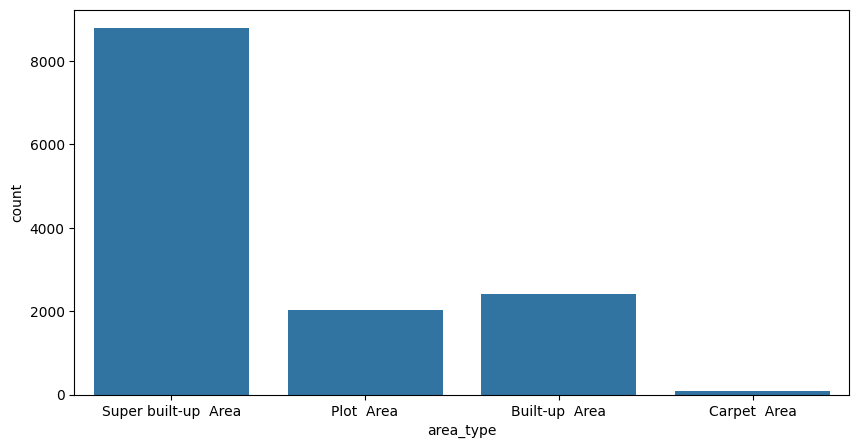

In [76]:
sb.countplot(x='area_type',data=housing)

In [77]:
housing['availability'].value_counts()

availability
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
19-Apr                     16
Immediate Possession       16
20-Aug                     16
19-Oct                     15
21-Mar                     14
17-Jun                     

In [78]:
housing['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [79]:
housing['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [80]:
housing['society'].value_counts()

society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: count, Length: 2688, dtype: int64

In [81]:
housing['total_sqft'].value_counts()

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2117, dtype: int64

C:\Users\rizwan\AppData\Local\Temp\ipykernel_7400\519817256.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(housing['bath'],hist=True,kde=False,bins=50,color='blue',hist_kws={'edgecolor':'black'})


<Axes: xlabel='bath'>

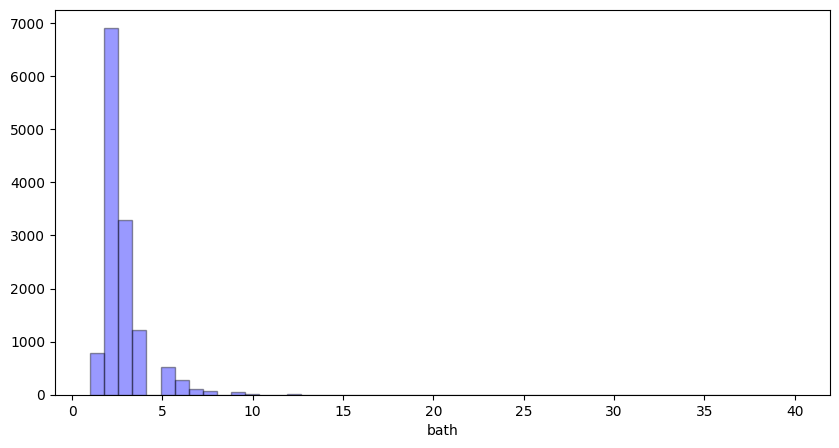

In [82]:
sb.distplot(housing['bath'],hist=True,kde=False,bins=50,color='blue',hist_kws={'edgecolor':'black'})

C:\Users\rizwan\AppData\Local\Temp\ipykernel_7400\3213691421.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(housing['price'],hist=True,kde=False,bins=50,color='blue',hist_kws={'edgecolor':'black'})


<Axes: xlabel='price'>

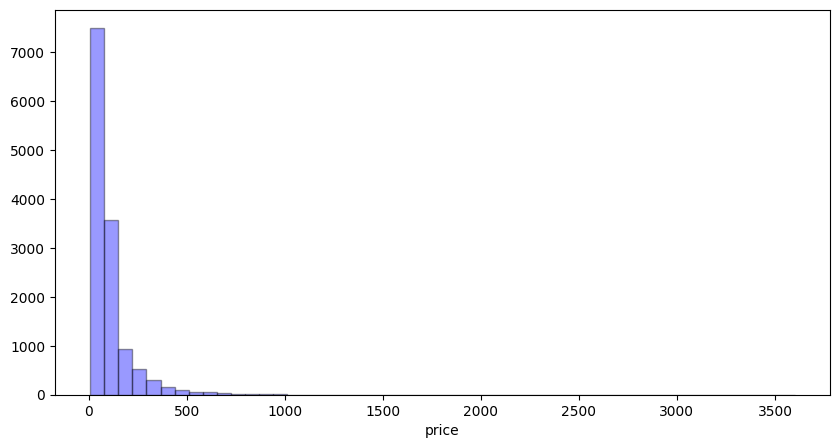

In [83]:
sb.distplot(housing['price'],hist=True,kde=False,bins=50,color='blue',hist_kws={'edgecolor':'black'})

In [84]:
housing.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [85]:
housing_clean=housing.copy()


In [86]:
housing_clean[pd.isnull(housing_clean['size'])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [87]:
housing_clean.dropna(axis=0,thresh=7,inplace=True)
# x= housing_clean.dropna(thresh=7)


In [88]:
housing_clean.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [89]:
housing_clean[pd.isnull(housing_clean['location'])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [90]:
housing_clean[housing_clean['society']=='Grare S']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [91]:
housing_clean['location'].replace(to_replace=np.nan,value='Anantapura')

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13304, dtype: object

In [92]:
housing_clean.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [93]:
housing_clean['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [94]:
housing_clean['bhk']=housing_clean['size'].apply(lambda x: int(x.split(" ")[0]))

In [95]:
housing_clean[pd.isnull(housing_clean['bath'])].head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.00,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.50,4
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.82,3
344,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,21.53,1
669,Super built-up Area,18-Dec,JP Nagar,5 BHK,Pehtsa,4400 - 6640,NaN,NaN,375.00,5


In [96]:
def fcnIsFloat(x):
    try:
        float(x)
    except:
        return False
    return True

housing_clean[~housing_clean['total_sqft'].apply(fcnIsFloat)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820,3
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770,2


In [97]:
metrics=[]
def fcnConvertToSqft(x,metric):
    if metric=='Acres':
        return x*43560
    elif metric=='Cents':
         return x*435.6
    elif metric=='Grounds':
         return x*2400
    elif metric=='Guntha':
         return x*1088.98
    elif metric=='Perch':
         return x*272.25
    elif metric=='Sq. Meter ':
         return x*10.7639
    elif metric=='Sq. Yards':
         return x*9
    else:
         return np.nan


def fcnExtractTotalSqft(x):
     try:
          values=x.split("-")
          return np.mean(list(map(float,values)))
     except:
         if x==np.nan:
              return np.nan
         else:
           for intIndex in range(len(x)-1,-1,-1):
            if fcnIsFloat(x[0:intIndex]):
               return fcnConvertToSqft(float(x[0:intIndex]),x[intIndex:])

In [98]:
housing_clean['sqft']=housing_clean['total_sqft'].apply(fcnExtractTotalSqft)

In [99]:
housing_clean['sqft'].describe()

count    1.328700e+04
mean     1.906197e+03
std      1.729525e+04
min      1.000000e+00
25%      1.100000e+03
50%      1.276000e+03
75%      1.680000e+03
max      1.306800e+06
Name: sqft, dtype: float64

In [100]:
housing_clean.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2,1200.0


In [101]:
housing_clean.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
bhk                0
sqft              17
dtype: int64

In [102]:
bhk_groupby_bathroom=housing_clean.groupby('bhk')['bath'].value_counts()

In [103]:
def fcnFillBathroom(bhk_groupby_bathroom,row):
    if pd.isnull(row['bath']):
        return int(bhk_groupby_bathroom[row['bhk']].index[0])
    else:
        return int(row['bath'])

In [104]:
bhk_groupby_bathroom=housing_clean.groupby('bhk')['bath'].value_counts()
housing_clean['bath']=housing_clean.apply(lambda row: fcnFillBathroom(bhk_groupby_bathroom,row),axis=1)

In [105]:
def fcnFIllbalcony(bhk_groupby_bathroom,row):
    if pd.isnull(row['balcony']):
        return int(bhk_groupby_bathroom[row['bhk']].index[0])
    else:
        return int(row['balcony'])

In [106]:
# Check if 'bhk' and 'balcony' columns exist
if 'bhk' in housing_clean.columns and 'balcony' in housing_clean.columns:
    # Group by 'bhk' and count 'balcony' values
    bhk_groupby_balcony = housing_clean.groupby('bhk')['balcony'].value_counts()
    
    # Define the function to fill balcony values
    def fcnFillBalcony(groupby_data, row):
        try:
            return groupby_data[row['bhk']].idxmax()
        except KeyError:
            return row['balcony']  # or some default value
    
    # Apply the function to fill 'balcony' values
    housing_clean['balcony'] = housing_clean.apply(lambda row: fcnFillBalcony(bhk_groupby_balcony, row), axis=1)
else:
    print("Columns 'bhk' or 'balcony' do not exist in the DataFrame.")

In [107]:
bhk_groupby_balcony=housing_clean.groupby('bhk')['balcony'].value_counts()
housing_clean['balcony']=housing_clean.apply(lambda row: fcnFIllbalcony(bhk_groupby_balcony,row),axis=1)

KeyError: 19

In [ ]:
housing_clean.drop(['society','size','total_sqft'],inplace=True,axis=1)

In [ ]:
housing_clean.isnull().sum()

area_type         0
availability      0
location          1
bath              0
balcony         593
price             0
bhk               0
sqft             17
dtype: int64